In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Custom imports
from matplotlib.cm import jet
from math import ceil, pi
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

# Chapter 8 - Material for synchronous session

This example tests the hypothesis that there is no preference in a cohort between blue and red at the 10% significance level.

In [3]:
nBlue = 17               # as surveyed
nRed  = 39               # as surveyed
nStudents = nBlue + nRed
cl    = 0.90             # 1 - significance
p     = 0.50             # example probability (null hypothesis)

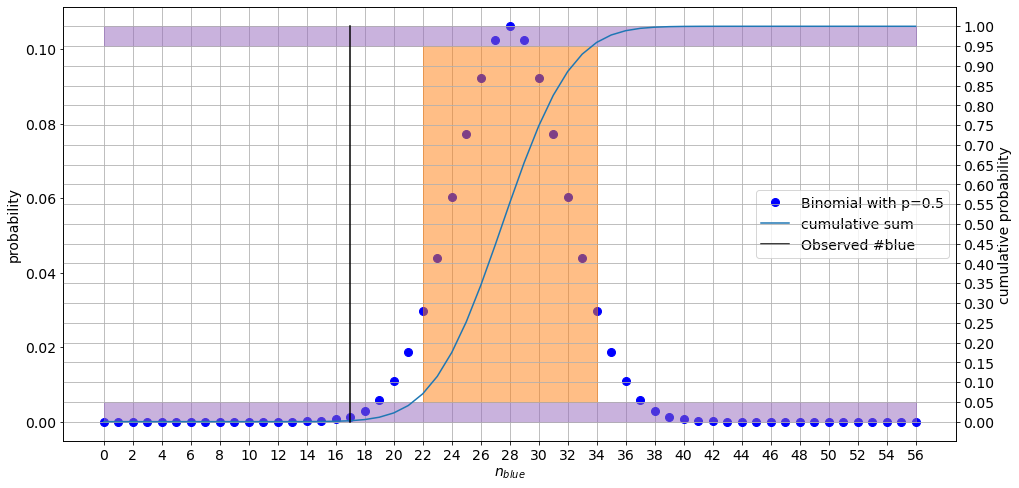

In [4]:
x = range(nStudents+1) # list of integers from 0 to nStudents
n = nStudents
limlow = (1-cl)/2      # lower limit of central confidence interval
limhigh = 1-limlow     # upper limit of central confidence interval
rv = binom(n, p)       # initialise binomial distribution
probs = rv.pmf(x)      # calculate binomial probabilities for all values of x and return list
ints = np.cumsum(probs, dtype=float) # calculate cumulative sum of probabilities

# work out limits of confidence interval based on cumulative sum of probabilities
x_low = 0
x_high = nStudents
for i in x:
    if ints[i]<limlow: x_low = i
    if ints[n-i]>limhigh: x_high = n-i
x_low += 1
        
# prepare two plots with common x axis
#plt.xkcd()
fig,ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xticks(x[0::2])
ax2 = ax1.twinx()

# draw two bands indicating the excluded part of the confidence level
pp = PatchCollection([Rectangle((0,0),n,limlow),
                      Rectangle((0,limhigh),n,limlow)],
                     alpha=0.5, color='tab:purple', label='outside CL')

# draw a rectangle indicating the selected confidence interval
pp2 = PatchCollection([Rectangle((x_low,limlow),x_high-x_low,cl)],
                      alpha=0.5, color='tab:orange', label='selected range')

# add these to the plot
ax2.add_collection(pp)
ax2.add_collection(pp2)

# plot the probability distribution
ax1.plot(x,probs, 'bo', ms=8, label='Binomial with p=0.5')

# plot the cumulative integral
ax2.plot(x,ints, '-', ms=8, label='cumulative sum')

ax2.plot([nBlue,nBlue],[0,1],'-', color='k', label='Observed #blue')

# plot optics
ax2.set_yticks([x/20. for x in range(21)])
ax1.grid(which='both',axis='x')
ax2.grid(which='major',axis='y')
ax1.set_xlabel('$n_{blue}$')
ax1.set_ylabel('probability')
ax2.set_ylabel('cumulative probability')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=5)

plt.show()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>